# Gaussian Mixture Model

## Resampling: SMOTE
## Data: df3_grouped

conda install -c glemaitre imbalanced-learn 


conda update scikit-learn

In [5]:
from sklearn import __version__ 
print('The scikit-learn version is {}.'.format(__version__))

The scikit-learn version is 0.19.1.


In [6]:
import pandas as pd, numpy as np #basic package

from scipy import stats
from sklearn import preprocessing

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GMM

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, log_loss, confusion_matrix

from sklearn.utils import resample # resample

from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt


## Import Data and Define Global Variables

In [7]:
df = pd.read_csv("data_folder/df3_grouped.csv", index_col = 0)
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted
0,0.024369,0.999109,0.000000,0.024369,0.000000,0.0,0.000000,0.024369,0,0,...,0,0,1,0,0,0,1,1,0,0
1,0.048069,0.945362,0.000000,0.288416,0.000000,0.0,0.000000,0.144208,0,0,...,1,0,1,0,0,1,0,0,1,0
2,0.105409,0.579751,0.263523,0.685160,0.105409,0.0,0.052705,0.316228,1,0,...,0,0,1,0,0,0,1,0,1,0
3,0.042201,0.928427,0.021101,0.337610,0.000000,0.0,0.000000,0.147704,0,0,...,1,0,1,0,0,1,0,0,1,0
4,0.019277,0.983135,0.000000,0.154217,0.000000,0.0,0.000000,0.096386,0,0,...,0,0,1,0,0,1,0,0,1,0


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
len(df.columns)

255

# Resample

In [11]:
pd.Series(y).value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

# SMOTE

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [13]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [14]:
pd.Series(y_train).value_counts()

1    63304
0    63304
dtype: int64

In [15]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X_train)

plt.scatter(X.iloc[:,0], X.iloc[:, 1], s = 1)

centers = np.empty(shape=(gmm.n_components, X.shape[1]))

# Centroids

In [16]:
Centroids = pd.DataFrame(centers)

In [17]:
Centroids.columns = X.columns

In [18]:
Centroids

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,0.000000e+00,7.748604e-304,0.0,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,...,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304
1,7.748604e-304,7.748604e-304,0.0,7.748604e-304,0.000000e+00,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,...,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304,7.748604e-304


In [37]:
GMM_Top_Features = pd.DataFrame(abs(Centroids.iloc[0,:] - Centroids.iloc[1,:])).sort_values(0, ascending = False)

In [40]:
GMM_Top_21 = GMM_Top_Features.head(21)

In [50]:
GMM_Top_21.to_csv("GMM_Top_21.csv")

### Save centroids to csv

Centroids.to_csv("Centroids_GMM_df3.csv")

In [20]:
for i in range(gmm.n_components):
    density = stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i],  allow_singular=True).logpdf(X_train)
    centers[i, :] = X_train[np.argmax(density)]

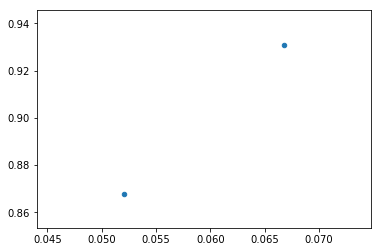

In [49]:
fig = plt.figure()
plt.scatter(centers[:, 0], centers[:, 1], s=20)
plt.show()
plt.savefig("yo.pdf")